# Linear Regression Exercises

In [313]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

---
## E0.0 A) Simulate Phone Dataset

**Dataset variables:**  
X: Time Spent on Phone  
y: Cost  

In [314]:
# random seed for reproducability
np.random.seed(42)

# 400 random normally distributed points with mu = 100, sigma = 100
X = abs(np.random.normal(100, 100, 400))
print(f"X:\n{X[:4]}\n{max(X) = }\n{min(X) = }\n")

# 400 random normally distributed noise points with mu = 0, sigma = 50
epsilon = np.random.normal(0, 50, 400)
print(f"epsilon:\n{epsilon[:4]}\n{max(epsilon) = }\n{min(epsilon) = }\n")


beta_0 = 25 # intercept
beta_1 = 2  # slope

# y as a function of X with random noise added
y = beta_0 + beta_1 * X + epsilon

print(f"y:\n{y[:4]}\n{max(y) = }\n{min(y) = }\n")

X:
[149.6714153   86.17356988 164.76885381 252.30298564]
max(X) = 485.2731490654721
min(X) = 0.25293646378088397

epsilon:
[-79.72138294 -29.96875115   0.26218499   2.34902969]
max(epsilon) = 153.94404042276187
min(epsilon) = -134.84433214707857

y:
[244.62144766 167.37838862 354.79989261 531.95500097]
max(y) = 1070.3485137054033
min(y) = -54.484386920295805



### Plotting Dataset

Including cutoff lines for outliers

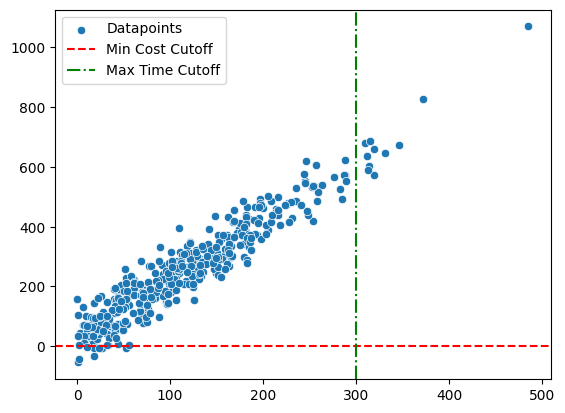

In [315]:
sns.scatterplot(x = X, y = y, label = "Datapoints")
plt.axhline(y = 0, color = "r", linestyle = "--", label = "Min Cost Cutoff")
plt.axvline(x = 300, color = "g", linestyle = "-.", label = "Max Time Cutoff")

plt.legend();

---
## E0.0 B) Remove Outliers

In [316]:
# getting indices where time is above 300
itemindex = np.where(X > 300)

# times above 300
X[itemindex]

array([346.32421125, 319.04556258, 372.01691666, 485.27314907,
       331.46585667, 314.39440893, 312.2156197 , 313.30333747,
       309.23872757, 315.31824575, 318.98029332])

In [317]:
# deleting indices of X outliers from both X and y
X = np.delete(X, itemindex)
y = np.delete(y, itemindex)

In [318]:
# getting indices where cost is below 0
itemindex = np.where(y < 0)

# costs below 0
y[itemindex]

array([-54.48438692,  -5.69655783,  -4.83339438, -41.67731495,
        -6.05340775,  -3.36951318, -31.48779068,  -6.98074857])

In [319]:
# deleting indices of y outliers from both X and y
X = np.delete(X, itemindex)
y = np.delete(y, itemindex)

In [320]:
# no more values below 0 cost or above 300 time
np.where(X > 300), np.where(y < 0)

((array([], dtype=int64),), (array([], dtype=int64),))

### Plotting Data After Removing Outliers

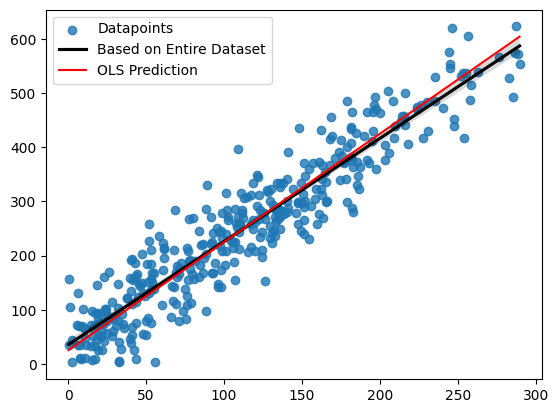

In [321]:
sns.regplot(x = X, y = y, label = "Datapoints", line_kws={"color": "black", "label": "Based on Entire Dataset"})
sns.lineplot(x = X, y = 2 * X + 25, color = "red", label = "OLS Prediction")

plt.legend();

---
## E0.0 C) Insert Values in DataFrame

Note that the dataframe is not used moving forwards as I intend to use numpy as much as possible for these exercises

In [322]:
df = pd.DataFrame()

df["X"] = X
df["y"] = y

df.head()

,X,y
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


---
## E0.1 A) Create Train | Test Split Function

In [323]:
def test_test_test(X, y, train_fraction = 0.7, random_state = 42, replace = False) -> tuple:
    
    # seed for reproducability
    np.random.seed(random_state)

    # amount of indices for training data
    n = int(len(X) * train_fraction)

    # generating array of random indices
    indices = np.random.choice(len(X), size = n, replace = replace)

    # split X and y into train and test data based on indices array
    X_train = X[indices]
    X_test = X[np.in1d(np.arange(len(X)), indices, invert=True)]

    y_train = y[indices]
    y_test = y[np.in1d(np.arange(len(y)), indices, invert=True)]

    return (X_train, X_test, y_train, y_test)

---
## E0.1 B) Split Dataset

In [324]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = test_test_test(X, y)

# checking dimensions to make sure everything looks right
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((266,), (266,), (115,), (115,))

---
## 0.2) Simple Linear Regression with Normal Equation

### Adding column of ones to X for use in normal equation

In [325]:
# adding a column of ones for coming calculation
ones = np.ones((len(X_train),))
X_train_matrix = np.stack((ones, X_train), axis= -1)

X_train_matrix[:3], X_train_matrix.shape

(array([[ 1.        , 39.97831228],
        [ 1.        , 11.61425638],
        [ 1.        , 53.9361229 ]]),
 (266, 2))

In [326]:
# adding a column of ones for coming calculation
ones = np.ones((len(X_test),))
X_test_matrix = np.stack((ones, X_test), axis= -1)

X_test_matrix[:3], X_test_matrix.shape

(array([[ 1.        , 86.17356988],
        [ 1.        , 76.58466253],
        [ 1.        , 53.05256141]]),
 (115, 2))

### Defining and using normal equation function to estimate beta

In [327]:
# defining function for estimating unknown parameters (beta vector)
OLS = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y

# using function to estimate beta_hat based on training data
beta_hat = OLS(X_train_matrix, y_train)

beta_hat

array([32.22147722,  1.91050591])

In [328]:
# looking at dimensions to make sure everything is ready to move on
beta_hat.shape, X_test.shape, y_test.shape

((2,), (115,), (115,))

---
## E0.3 A) Prediction

### Defining and using prediction

In [329]:
# prediction function
predict = lambda x, beta: np.dot(x, beta)

# storing predictions to y_pred, reshaping from (115,1) to (115,)
y_pred = predict(X_test_matrix, beta_hat)

y_pred[:3], y_pred.shape

(array([196.85659218, 178.53692796, 133.57870958]), (115,))

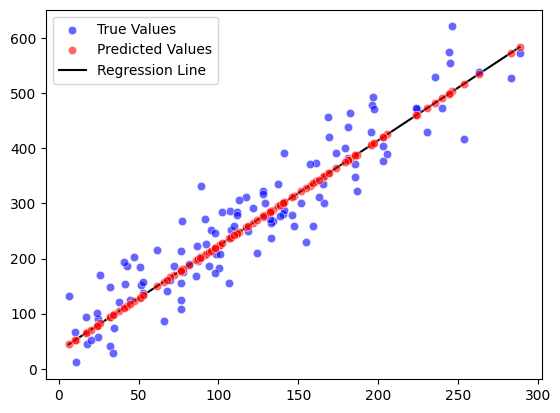

In [330]:
sns.scatterplot(x = X_test, y = y_test, color = "blue", alpha = 0.6, label = "True Values")
sns.scatterplot(x = X_test, y = y_pred, color = "red", alpha = 0.6, label = "Predicted Values")
sns.lineplot(x = X_test, y = y_pred, color = "black", zorder = 0, label = "Regression Line");

---
## E0.3 B) Evaluation

### Calculating MAE, MSE, RMSE

In [331]:
m = len(y_test)

mean_absolute_error = np.sum(np.abs(y_test - y_pred)) / m

mean_squared_error = np.sum((y_test - y_pred) ** 2) / m

root_mean_squared_error = np.sqrt(mean_squared_error)


print(f"MAE: {mean_absolute_error}")
print(f"MSE: {mean_squared_error}")
print(f"RMSE: {root_mean_squared_error}")

MAE: 40.12002651149212
MSE: 2401.5771288677274
RMSE: 49.00588871623213


---
## E0.4 A) Simulate More Explanatory Variables

In [332]:
def simulate_sample(sample_size = 10000):

    np.random.seed(42) # for reproducability

    x1 = np.abs(np.random.normal(loc = 100, scale = 100, size = sample_size))
    x2 = np.random.uniform(low = 0, high = 50, size = sample_size)
    x3 = np.abs(np.random.normal(loc = 0, scale = 2, size = sample_size))
    epsilon = np.random.normal(loc = 0, scale = 50, size = sample_size)

    beta_0 = 25
    beta_1 = 2
    beta_2 = 0.5
    beta_3 = 50

    y = beta_0 + beta_1 * x1 + beta_2 * x2 + beta_3 * x3 + epsilon

    return x1, x2, x3, y

In [333]:
x1, x2, x3, y = simulate_sample()

print(f"y:\n{y[:3]}\n{y.shape}")

y:
[397.26250585 282.88539363 458.57576217]
(10000,)


---
## E0.4 B) Plot Raw Data

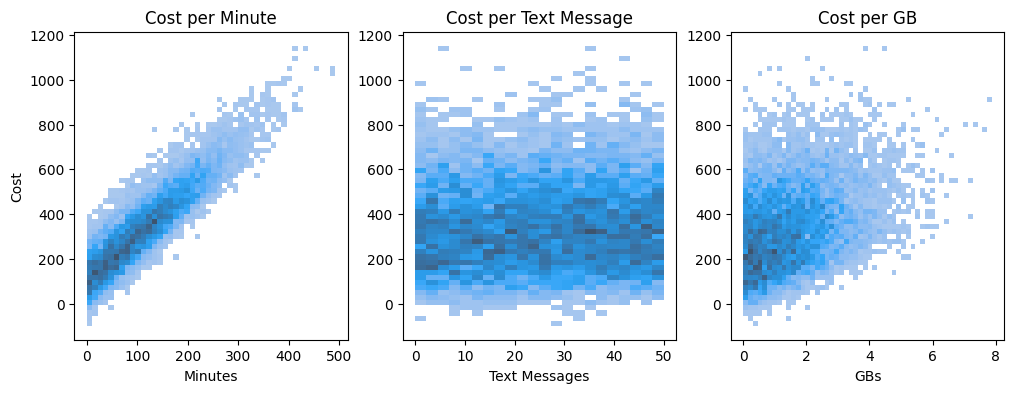

In [334]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
variables = ["Minute", "Text Message", "GB"]

for i, x in enumerate([x1, x2, x3]):
    sns.histplot(x = x, y = y, ax = ax[i])
    ax[i].set_title(f"Cost per {variables[i]}")
    ax[i].set_xlabel(variables[i] + "s")

ax[0].set_ylabel("Cost");

---
## E0.4 C) Clean Data

In [335]:
def clean_data(x1, x2, x3, y):
    # minutes must be less than 300
    itemindex = np.where(x1 >= 300)

    x1 = np.delete(x1, itemindex)
    x2 = np.delete(x2, itemindex)
    x3 = np.delete(x3, itemindex)
    y = np.delete(y, itemindex)

    # GB must be less than 4
    itemindex = np.where(x3 >= 4)

    x1 = np.delete(x1, itemindex)
    x2 = np.delete(x2, itemindex)
    x3 = np.delete(x3, itemindex)
    y = np.delete(y, itemindex)

    # cost must be greater than 0
    itemindex = np.where(y <= 0)

    x1 = np.delete(x1, itemindex)
    x2 = np.delete(x2, itemindex)
    x3 = np.delete(x3, itemindex)
    y = np.delete(y, itemindex)

    return x1, x2, x3, y

In [336]:
x1, x2, x3, y = clean_data(x1, x2, x3, y)

---
## E0.4 D) Plot Clean Data

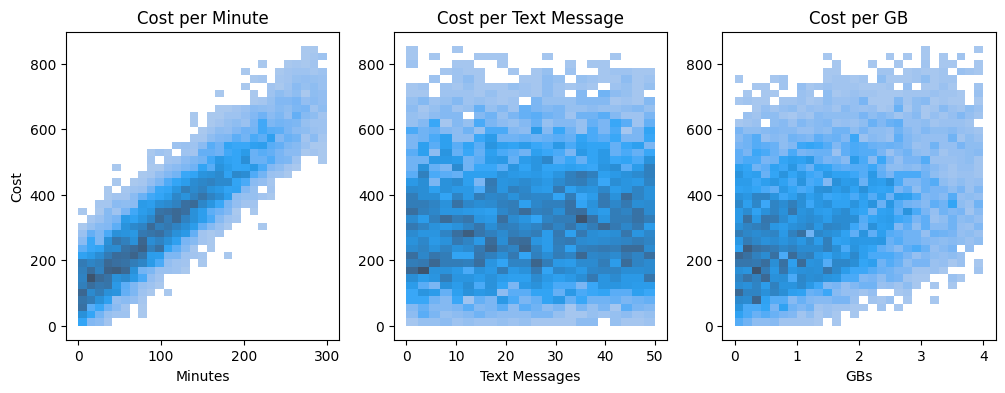

In [337]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
variables = ["Minute", "Text Message", "GB"]

for i, x in enumerate([x1, x2, x3]):
    sns.histplot(x = x, y = y, ax = ax[i])
    ax[i].set_title(f"Cost per {variables[i]}")
    ax[i].set_xlabel(variables[i] + "s")

ax[0].set_ylabel("Cost");

---
## E0.5 A) Perform Train | Test Split on Data

Split with 0.8 of data for training

In [338]:
def insert_ones():
    # adding a column of ones for coming calculation
    ones = np.ones((len(x1),))
    X = np.stack((ones, x1, x2, x3), axis= -1)

    return X

In [339]:
X = insert_ones()

X[:3], X.shape

(array([[  1.        , 149.6714153 ,  16.06275867,   0.95891882],
        [  1.        ,  86.17356988,   5.15095972,   2.05613562],
        [  1.        , 164.76885381,   3.59037727,   1.00400378]]),
 (9320, 4))

In [340]:
X_train, X_test, y_train, y_test = test_test_test(X, y, train_fraction = 0.8)

# checking dimensions to make sure everything looks right
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7456, 4), (7456,), (1864, 4), (1864,))

---
## E0.5 B) Use Normal Equation to Compute Beta Hat

In [341]:
beta_hat = OLS(X_train, y_train)

beta_hat[:3]

array([26.14229641,  1.98862983,  0.47448824])

In [342]:
# looking at dimensions to make sure everything is ready to move on
beta_hat.shape, X_test.shape, y_test.shape

((4,), (1864, 4), (1864,))

---
## E0.5 C) Prediction and Evaluation

In [343]:
y_pred = predict(X_test, beta_hat)

y_pred[:3], y_pred.shape

(array([302.30727053, 405.48903432, 218.93494364]), (1864,))

### Calculating MAE, MSE, RMSE

In [344]:
# defining functions to calculate MAE, MSE, RMSE
mean_absolute_error = lambda y_test, y_pred: np.sum(np.abs(y_test - y_pred)) / len(y_test)
mean_squared_error = lambda y_test, y_pred: np.sum((y_test - y_pred) ** 2) / len(y_test)
root_mean_squared_error = lambda y_test, y_pred: np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {root_mean_squared_error(y_test, y_pred)}")

MAE: 39.910473136586326
MAE: 2477.8016469103436
MAE: 49.777521502283975


---
## E0.5 D) Repeat Previous Steps with Different Sample Size

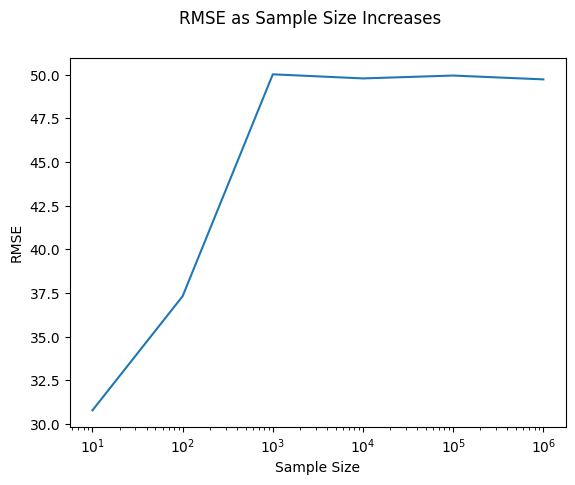

In [345]:
samples = [10, 100, 1000, 10000, 100000, 1000000]
RMSE_list = []

for i in samples:
    x1, x2, x3, y = simulate_sample(sample_size = i)
    x1, x2, x3, y = clean_data(x1, x2, x3, y)
    X = insert_ones()
    X_train, X_test, y_train, y_test = test_test_test(X, y, train_fraction = 0.8)
    beta_hat = OLS(X_train, y_train)
    y_pred = predict(X_test, beta_hat)
    RMSE = root_mean_squared_error(y_test, y_pred)
    RMSE_list.append(RMSE)
    
sns.lineplot(x = samples, y = RMSE_list)
plt.suptitle("RMSE as Sample Size Increases")
plt.ylabel("RMSE")
plt.xlabel("Sample Size")
plt.xscale("log")
    